In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow

     |████████████████████████████████| 479.6 MB 119.6 MB/s eta 0:00:01     |█████████████████████           | 315.2 MB 119.8 MB/s eta 0:00:02     |█████████████████████▏          | 317.2 MB 119.8 MB/s eta 0:00:02     |███████████████████████▎        | 348.7 MB 110.9 MB/s eta 0:00:02
     |████████████████████████████████| 57 kB 3.2 MB/s s eta 0:00:01
     |████████████████████████████████| 5.9 MB 40.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 8.5 MB/s s eta 0:00:01
     |████████████████████████████████| 71 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 2.4 MB 125.8 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 131.0 MB/s eta 0:00:01     |█████████████▊    

In [5]:
# Mock Data Generation for metabolites
np.random.seed(42)
n_samples = 200
n_metabolites = 50  # Assume we have 50 metabolites
data = np.random.rand(n_samples, n_metabolites)  # Random data for metabolites
labels = np.random.choice([0, 1], size=(n_samples,))  # 0 for control, 1 for disease

In [6]:
# Convert to DataFrame for visualization
metabolite_df = pd.DataFrame(data, columns=[f'Metabolite_{i}' for i in range(n_metabolites)])
metabolite_df['Disease'] = labels

In [7]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metabolite_df.drop('Disease', axis=1))

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, stratify=labels, random_state=42)

In [9]:
# Define Autoencoder Model
input_dim = X_train.shape[1]
encoding_dim = 10  # Dimensionality of the latent space

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

2024-11-05 11:14:32.942607: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
# Train the Autoencoder
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 1.2505 - val_loss: 1.2943
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2369 - val_loss: 1.2824
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2242 - val_loss: 1.2709
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2121 - val_loss: 1.2596
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.2001 - val_loss: 1.2487
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1888 - val_loss: 1.2377
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1773 - val_loss: 1.2271
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1660 - val_loss: 1.2165
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1547 - val_loss: 1.2062
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1436 - val_loss: 1.1960
Epoch 11

10/10 [==============================] - 0s 3ms/step - loss: 0.8955 - val_loss: 0.9938
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8945 - val_loss: 0.9934
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8934 - val_loss: 0.9929
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8924 - val_loss: 0.9925
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8913 - val_loss: 0.9920
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8903 - val_loss: 0.9916
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8893 - val_loss: 0.9912
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8883 - val_loss: 0.9909
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8873 - val_loss: 0.9905
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8863 - val_loss: 0.9902
Epoch 93/100


In [11]:
# Encode Data for Latent Space Representation
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

2/2 [==============================] - 0s 1ms/step


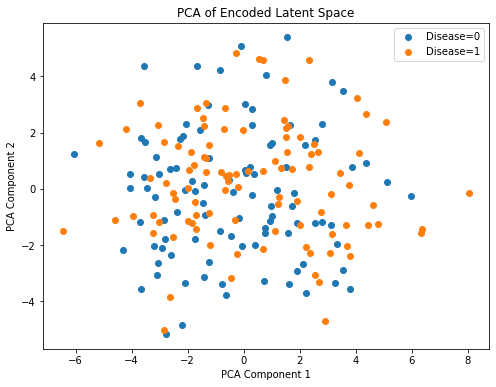

In [12]:
# Plotting PCA of Encoded Data to Check Separation of Disease and Control
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.vstack((X_train_encoded, X_test_encoded)))
y_combined = np.concatenate((y_train, y_test))

plt.figure(figsize=(8, 6))
for label in np.unique(y_combined):
    plt.scatter(X_pca[y_combined == label, 0],
                X_pca[y_combined == label, 1],
                label=f'Disease={label}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Encoded Latent Space')
plt.legend()
plt.show()

In [13]:
# Potential Biomarker Identification
# Calculate reconstruction error for each metabolite
reconstruction_error = np.mean(np.square(autoencoder.predict(X_scaled) - X_scaled), axis=0)
metabolite_errors = pd.DataFrame({'Metabolite': metabolite_df.columns[:-1], 'ReconstructionError': reconstruction_error})
metabolite_errors.sort_values(by='ReconstructionError', ascending=False, inplace=True)

7/7 [==============================] - 0s 715us/step


In [15]:
# Show top metabolites with the highest reconstruction error
# In that case, high reconstruction error (close to zero) means likely contains info that could not be
# compressed, hence means that this info/metabolite is likely disease-related
print("Potential biomarkers:")
print(metabolite_errors.head(10))

Potential biomarkers:
       Metabolite  ReconstructionError
26  Metabolite_26             0.991650
45  Metabolite_45             0.971265
2    Metabolite_2             0.964047
41  Metabolite_41             0.955458
12  Metabolite_12             0.954233
25  Metabolite_25             0.954135
27  Metabolite_27             0.952048
20  Metabolite_20             0.950521
30  Metabolite_30             0.948273
29  Metabolite_29             0.942754


Idea: Use an autoencoder to learn compressed representations of the data, reducing the dimensionality while preserving essential features.

- Application: Train the autoencoder with a small number of hidden units to avoid overfitting. You can then use the latent space representations as input features for a separate predictive model, like logistic regression or random forests, focused on identifying biomarkers.

- Benefits: Helps reduce noise and may uncover hidden structures relevant to biomarkers without directly fitting a large model.